## PyTorch End to End Workflow

In [60]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'1.12.1'

### 1. Data Loading and Preparing
* Create _known_ **parameters** using linear regression
* Y = a + b * x

In [61]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create range of numbers
start = 0
end = 1
step = 0.02
# X (capital) is a matrix or tensor in machine learning
# Unsqueezed in next line adds another dimension
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias

X[:10], y[:10]    # Display first 10 values

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [62]:
# Splitting data into training and test data is one of the most important concept of machine learning
# Creating 2 or 3 sets: Training Set (75% data), Validation Set (15%), Testing Set (15%)

len(X), len(y)

(50, 50)

In [63]:
# There are 50 sets, so lets make 80/20 split train/test

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [64]:
def plot_predictions(train_data = X_train, 
                    train_labels = y_train, 
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """
    Plots training data, test data, compares predictions.
    """
    plt.figure(figsize = (10, 7))
    # Plot training in blue
    plt.scatter(train_data, 
                train_labels, 
                c="b", 
                s=4, 
                label="Training data")
    # Plot test data in green
    plt.scatter(test_data, 
                test_labels, 
                c="g", 
                s=4, 
                label="Test data")
    # Are there predictions? If yes, plot
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    
    #Show legent
    plt.legend(prop={'size': 14});    

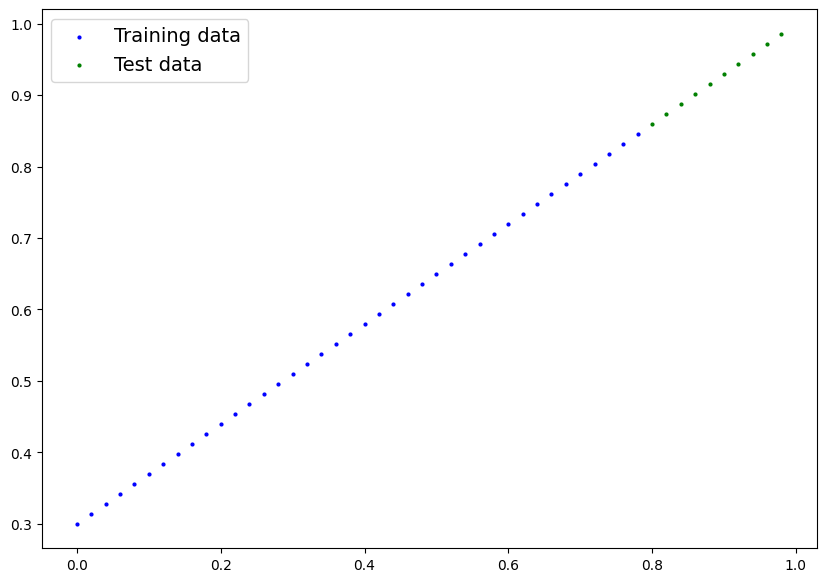

In [65]:
plot_predictions()

### 2. Build PyTorch Model

In [66]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()        
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float
        ))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        
    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [67]:
# Create random seed for our model for consistency
torch.manual_seed(42)

# create an instance of lin reg model
model_0 = LinearRegressionModel()
# check parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [68]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_mode()'

In [69]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

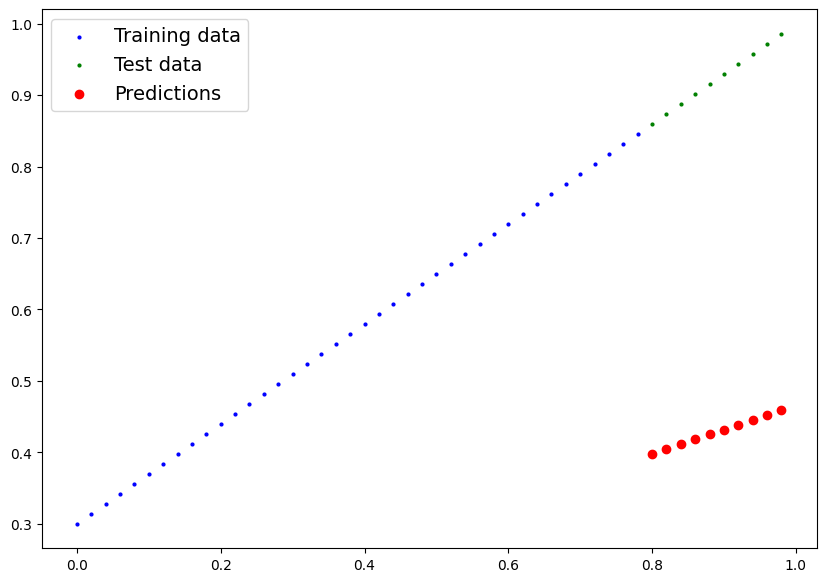

In [70]:
plot_predictions(predictions = y_preds)

#### How to make inference code in PyTorch run faster:
https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKavO9iTgwQ-rfri6u7PQ

### Loss Function
* **Loss function**: measures how wrong your model's predictins are to the ideal output
* **Optimizer**: takes into account the loss of model and adjusts the model's parameters to improve the loss function


In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [72]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1) # learning rate = most important hyperparameter



### Building a training loop (and testing loop) in PyTorch
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimize the zero grad
4. Loss backward
5. Optimizer step

In [126]:
# An epoch is one loop through the data...
epochs = 100

# 0. Loop through the data
for epoch in range(epochs):
    # set model to training mode
    model_0.train() #trains model in PyTorch

    # 1. Forward Pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    # 3. Optimize the zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation
    loss.backward()
    
    #5. Step the optimizer
    optimizer.step()
        
    model_0.eval() #Turns off gradient tracking
    print(model_0.state_dict())

Loss: 0.07543627172708511
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss: 0.039773717522621155
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss: 0.07543627172708511
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss: 0.039773717522621155
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss: 0.07543627172708511
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss: 0.039773717522621155
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss: 0.07543627172708511
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss: 0.039773717522621155
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss: 0.07543627172708511
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss: 0.039773717522621155
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss:

In [124]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    

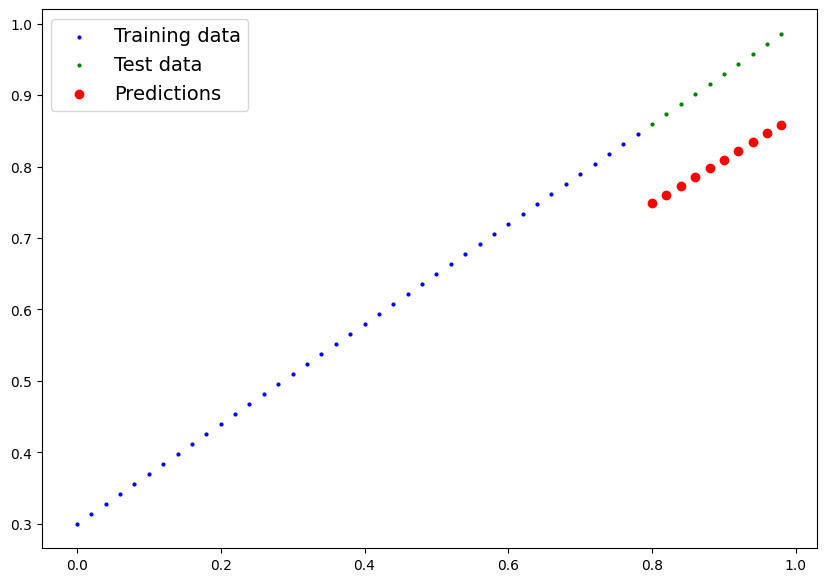

In [125]:
plot_predictions(predictions=y_preds_new)